In [1]:
#Import API
from dora.api import DataExplorer

import pandas as pd
from datetime import date, timedelta
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

explorer = DataExplorer()

In [2]:
cat_search = explorer.categories.stringsearch(string_search="Cats").to_pandas()
cat_search

,classification,node_id,level_0,level_1,level_2,level_3,level_4,level_5
0,Children's Cat Books,2804,Books,Children's Books,Animals,Cats,N/A,N/A
1,Fiction,8951149011,Books,Children's Books,Animals,Cats,Fiction,N/A
2,Nonfiction,8951150011,Books,Children's Books,Animals,Cats,Nonfiction,N/A
3,Cat Care,5045,Books,"Crafts, Hobbies & Home",Pets & Animal Care,Cats,N/A,N/A
4,Cat Breeds,5046,Books,"Crafts, Hobbies & Home",Pets & Animal Care,Cats,Breeds,N/A
5,Cat Care & Health,5047,Books,"Crafts, Hobbies & Home",Pets & Animal Care,Cats,Care & Health,N/A
6,General,5048,Books,"Crafts, Hobbies & Home",Pets & Animal Care,Cats,General,N/A
7,Cat Training,11160419011,Books,"Crafts, Hobbies & Home",Pets & Animal Care,Cats,Training,N/A
8,"Cat, Dog & Animal Humor",4459,Books,Humor & Entertainment,Humor,"Cats, Dogs & Animals",N/A,N/A
9,"Biology of Cats, Lions & Tigers",13483,Books,Science & Math,Biological Sciences,Animals,"Cats, Lions & Tigers",N/A


In [3]:
cat_humor_parent = explorer.categories.parentOf(node_id=cat_search['node_id'][0]).to_pandas()
cat_humor_parent

,nodeID,level,parent_node_id
0,2804,3,2787


In [4]:
cat_humor_children = explorer.categories.childrenOf(node_id=cat_search['node_id'][0]).to_pandas()
cat_humor_children

,nodeID,level,child_node_id
0,2804,3,8951149011
1,2804,3,8951150011


In [5]:
products = explorer.products.byCategory(nodeid=cat_humor_parent['parent_node_id'][0]).to_pandas()
products

,productid
0,10810


## Category: Programming Languages

In [6]:
Python_search = explorer.categories.stringsearch(string_search="Python").to_pandas()
Python_search

,classification,node_id,level_0,level_1,level_2,level_3,level_4,level_5
0,Python Programming,285856,Books,Computers & Technology,Programming,Languages & Tools,Python,N/A
1,Python Programming,285856,Books,Computers & Technology,Programming,Web Programming,Python,N/A
2,Python Programming,285856,Books,Computers & Technology,Programming Languages,Python,N/A,N/A
3,Python Programming,285856,Books,Computers & Technology,Web Development & Design,Programming,Python,N/A


In [7]:
Python_parent = explorer.categories.parentOf(node_id=Python_search['node_id'][0]).to_pandas()
Python_parent

,nodeID,level,parent_node_id
0,285856,4,3600


In [8]:
Python_sibling = explorer.categories.childrenOf(node_id=Python_parent['parent_node_id'][0]).to_pandas()
Python_sibling

,nodeID,level,child_node_id
0,3600,3,3602
1,3600,3,3605
2,3600,3,3617
3,3600,3,285856
4,3600,3,285858
5,3600,3,295223
6,3600,3,411314
7,3600,3,554538
8,3600,3,379357011
9,3600,3,379358011


In [9]:
Python_products = explorer.products.byCategory(nodeid=Python_parent['parent_node_id'][0]).to_pandas()
Python_products

,productid
0,12209
1,12319


In [10]:
NodeSearch=explorer.categories.nodesearch(node_id = 285856).to_pandas()
NodeSearch

,classification,node_id,level_0,level_1,level_2,level_3,level_4,level_5
0,Python Programming,285856,Books,Computers & Technology,Programming,Languages & Tools,Python,N/A
1,Python Programming,285856,Books,Computers & Technology,Programming,Web Programming,Python,N/A
2,Python Programming,285856,Books,Computers & Technology,Programming Languages,Python,N/A,N/A
3,Python Programming,285856,Books,Computers & Technology,Web Development & Design,Programming,Python,N/A


### Child/Parent Ratings Review

In [11]:
def plotratings(asin = []):
    row = -1

    for i in range(len(dates)-1):
        if i%3 == 0:
            row += 1

        ratings = explorer.products.ratingsDistribution(
            min_date=dates[i],
            max_date=dates[(i+1)], 
            asin=asin)
    
        if len(ratings.results) == 0:
            continue     
    
        ratings_df = pd.DataFrame(
            data=ratings.results, 
            columns=ratings.columns)

    
        ratings_df.plot.bar(
            ax=ax[row][i%3],
            x='asin',
            y=[
                'one_star_votes',
                'two_star_votes',
                'three_star_votes',
                'four_star_votes',
                'five_star_votes'
            ])
        ax[row][i%3].legend().remove()
        ax[row][i%3].set_title(dates[i])
    

    plt.show()

### Ruby Programing
#### Books/Computers & Technology/Programming/Languages & Tools/Ruby

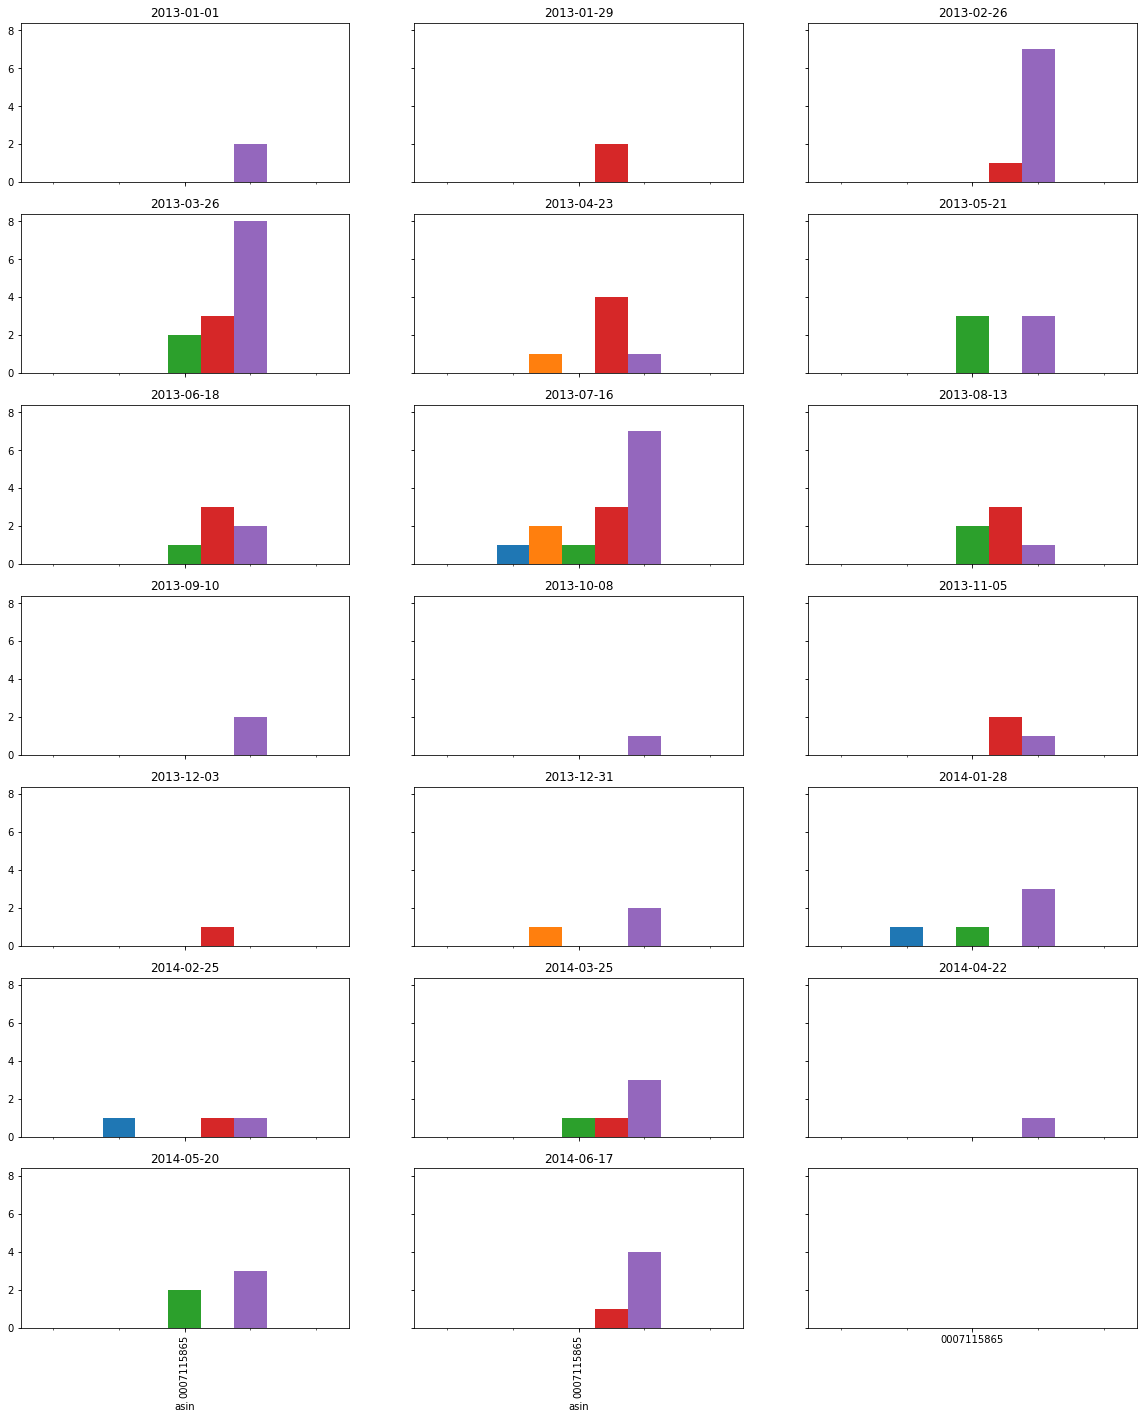

In [12]:
start = date(2013,1,1)
delta = timedelta(weeks=4)
dates = [start + (delta*x) for x in range(0, 36)]

fig, ax = plt.subplots(7, 3, 
    sharex=True, 
    sharey=True, 
    figsize=(20,24))

plotratings(asin=['0007115865'])

### Python Programming
#### Books/Computers & Technology/Programming/Languages & Tools/Python

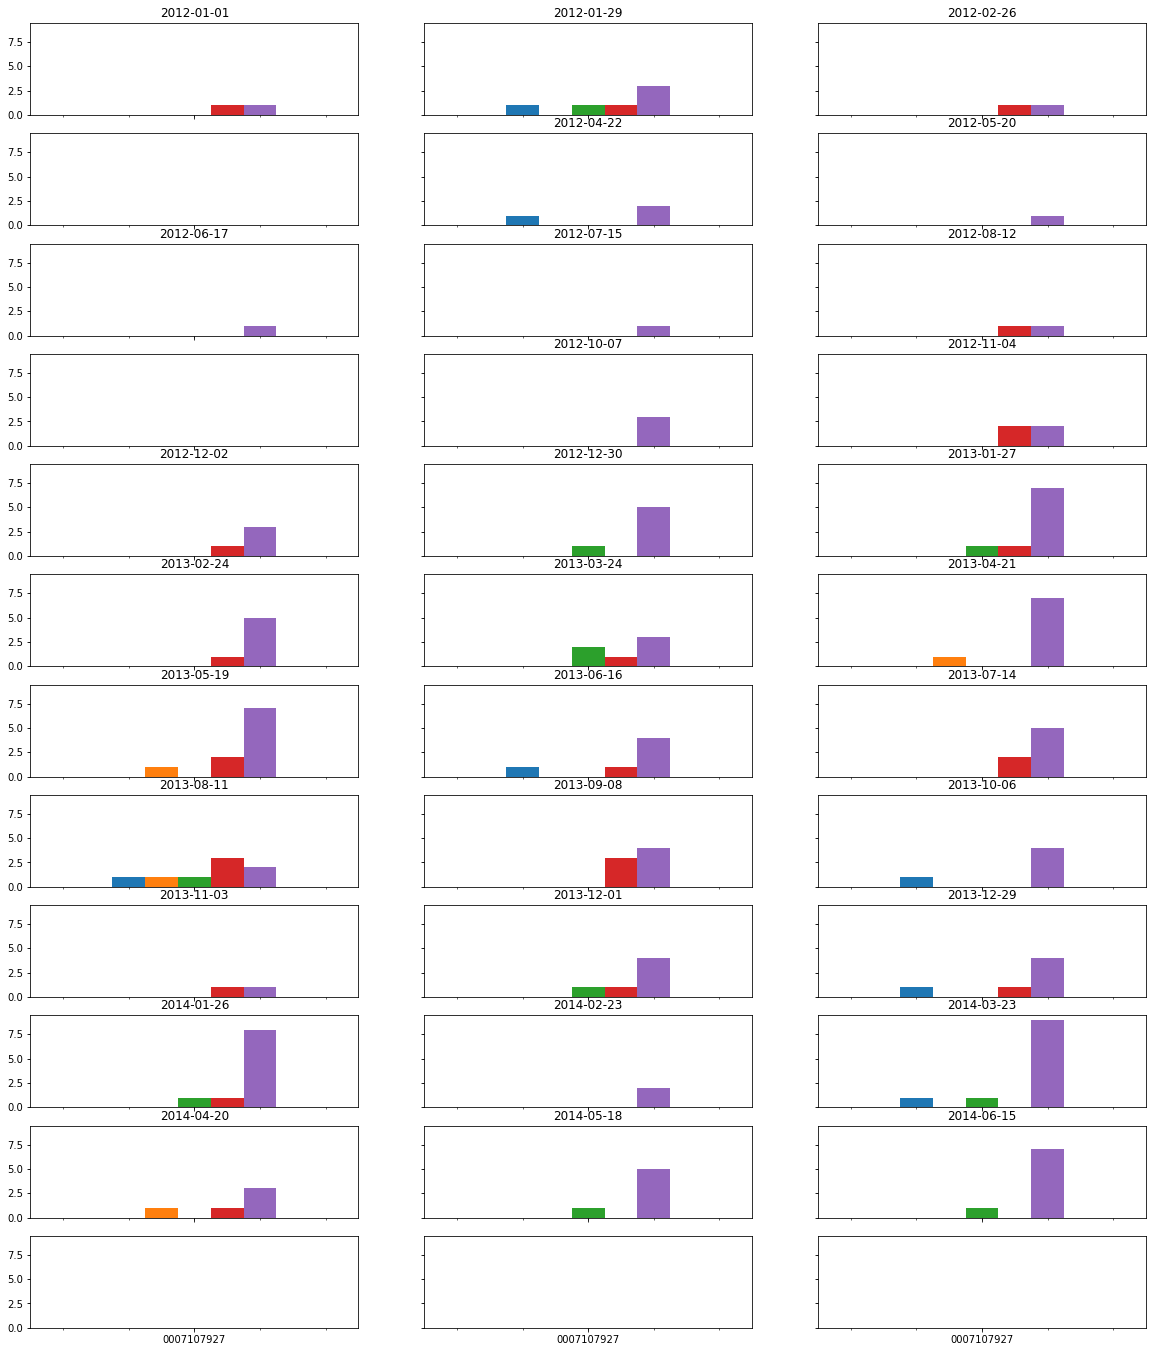

In [13]:
start = date(2012,1,1)
delta = timedelta(weeks=4)
dates = [start + (delta*x) for x in range(0, 36)]

fig, ax = plt.subplots(12, 3, 
    sharex=True, 
    sharey=True, 
    figsize=(20,24))

plotratings(asin=['0007107927'])

## Benchmarking

In [15]:
explorer.benchmarks.statsByFunction(function_filter=[]).results

[('Customers.idsForCustomer', False, 276.020162, 1104.080648, 4),
 ('Customers.clusterCustomers', False, 88.8559039166667, 2132.541694, 24),
 ('Categories.parentsOf', True, 63.841114, 63.841114, 1),
 ('Products.ratingsDistribution', False, 5.00597581818182, 55.065734, 11),
 ('Products.byCategory', True, 4.0820138, 20.410069, 5),
 ('Products.statsByProduct', False, 3.89878075, 77.975615, 20),
 ('Products.priceDistribution', False, 3.38223020689655, 98.084676, 29),
 ('Categories.parentOf', True, 2.33737821052632, 44.410186, 19),
 ('Products.seasonalOrderDistribution', False, 1.2705358125, 20.328573, 16),
 ('Categories.search', False, 1.023032, 1.023032, 1),
 ('Reviews.termsByAsin', False, 0.977624, 0.977624, 1),
 ('Products.clusterProducts', False, 0.962731268518519, 103.974977, 108),
 ('Categories.parentOf', False, 0.618921333333333, 1.856764, 3),
 ('Categories.childrenOf', False, 0.56445175, 2.257807, 4),
 ('Categories.parentsOf', False, 0.395447, 0.790894, 2),
 ('Customers.statsByCust